# Pymaceuticals Inc.

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/mouse_metadata.csv"
study_results_path = "data/study_results.csv"

# Data

In [65]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

data_unclean = pd.merge(study_results, mouse_metadata)
data_unclean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [66]:
num_of_mice_unclean = data_unclean["Mouse ID"].nunique()
num_of_mice_unclean

249

In [68]:
duplicates = data_unclean[data_unclean.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicates["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [69]:
data_unclean[data_unclean["Mouse ID"].isin(duplicate_mouse_ids)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [70]:
data = data_unclean[~data_unclean["Mouse ID"].isin(duplicate_mouse_ids)]
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [71]:
num_of_mice = data["Mouse ID"].nunique()
num_of_mice

248

# Summary Statistics

In [73]:
tumor_volume_mean = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_median = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_statistics = pd.DataFrame({
    "Tumor Volume (mean)": tumor_volume_mean,
    "Tumor Volume (median)": tumor_volume_median,
    "Tumor Volume (variance)": tumor_volume_variance,
    "Tumor Volume (std)": tumor_volume_std,
    "Tumor Volume (sem)": tumor_volume_sem,
})

summary_statistics.head()

,Tumor Volume (mean),Tumor Volume (median),Tumor Volume (variance),Tumor Volume (std),Tumor Volume (sem)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


# Bar Chart and Pie Chart

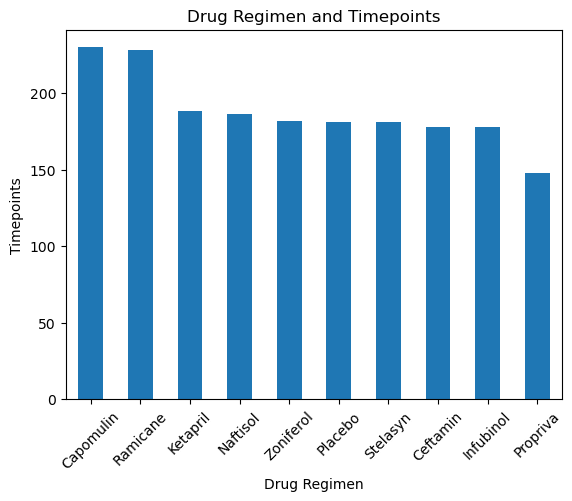

In [132]:
# data
drugregimen_and_timepoints = data.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)

# figure
figure = drugregimen_and_timepoints.plot.bar(x="Drug Regimen", y="Timepoint")

# formatting
figure.set_title("Drug Regimen and Timepoints")
figure.set_xlabel("Drug Regimen")
figure.set_ylabel("Timepoints")

plt.xticks(rotation=45)

# show
plt.show()

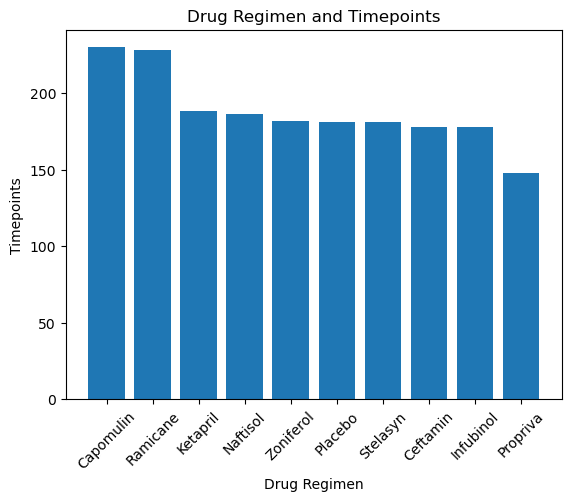

In [133]:
# figure
plt.bar(drugregimen_and_timepoints.index, drugregimen_and_timepoints.values)

# formatting
plt.title("Drug Regimen and Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

plt.xticks(rotation=45)

# show
plt.show()

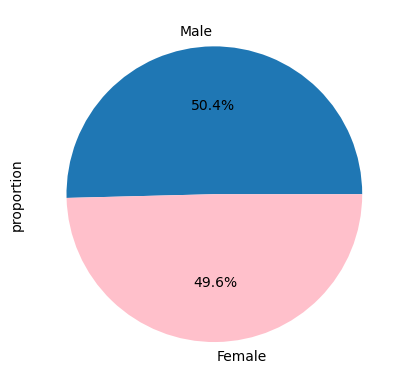

In [134]:
# data
unique_mice = data.drop_duplicates(subset="Mouse ID")
sex_percentages = unique_mice["Sex"].value_counts(normalize=True) * 100

# figure
figure = sex_percentages.plot.pie(autopct="%1.1f%%", colors=["tab:blue", "pink"])

# show
plt.show()

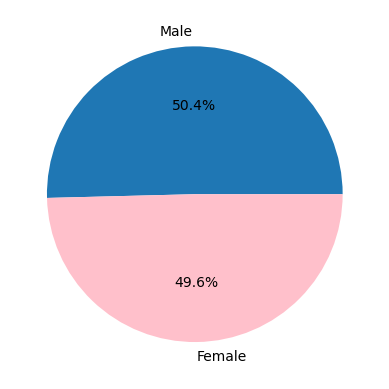

In [136]:
# figure
plt.pie(sex_percentages, labels=sex_percentages.index, autopct="%1.1f%%", colors=["tab:blue", "pink"])

# show
plt.show()

# Quartiles, Outliers, and Boxplots

In [32]:
last_timepoints = data.groupby("Mouse ID")["Timepoint"].max()
last_timepoints_data = pd.merge(last_timepoints, data, on=["Mouse ID", "Timepoint"], how="left")
last_tumor_volumes = last_timepoints_data.set_index("Mouse ID")["Tumor Volume (mm3)"]
last_tumor_volumes

Mouse ID
a203    67.973419
a251    65.525743
a262    70.717621
a275    62.999356
a366    63.440686
          ...    
z435    48.710661
z578    30.638696
z581    62.754451
z795    65.741070
z969    73.867845
Name: Tumor Volume (mm3), Length: 248, dtype: float64

In [33]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volumes = []

for treatment in treatments:
    
    treatment_data = last_timepoints_data[treatment == last_timepoints_data["Drug Regimen"]]["Tumor Volume (mm3)"]
    tumor_volumes.append(treatment_data)

    q1 = treatment_data.quantile(.25)
    q3 = treatment_data.quantile(.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


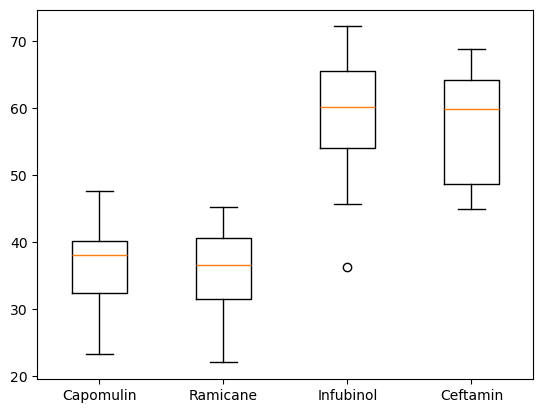

In [34]:
tumor_volumes = [last_timepoints_data[treatment == last_timepoints_data["Drug Regimen"]]["Tumor Volume (mm3)"] for treatment in treatments]

plt.boxplot(tumor_volumes, tick_labels=treatments)

plt.show()

# Line Plot and Scatter Plot

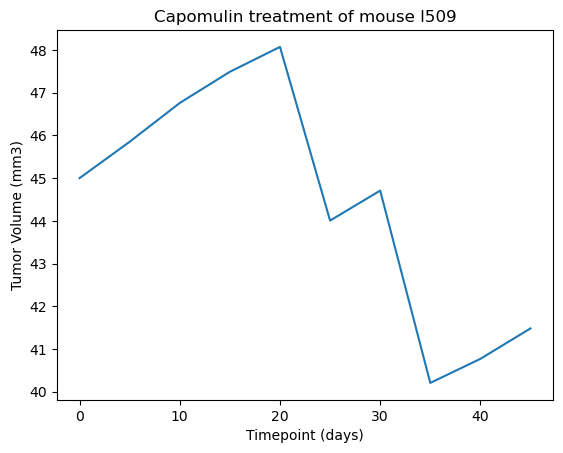

In [35]:
capomulin_data = data[(data["Drug Regimen"] == "Capomulin") & (data["Mouse ID"] == "l509")]

plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"])

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

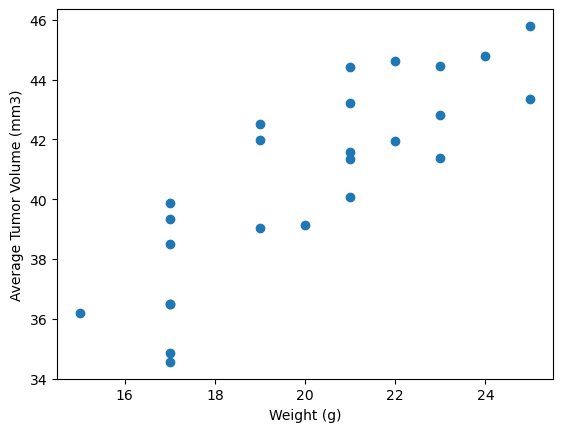

In [36]:
capomulin_data = data[data["Drug Regimen"] == "Capomulin"]
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()
tumor_volume_averages = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weights, tumor_volume_averages)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

# Correlation and Regression

The correlation between mouse_weights and tumor_volume_averages is 0.84


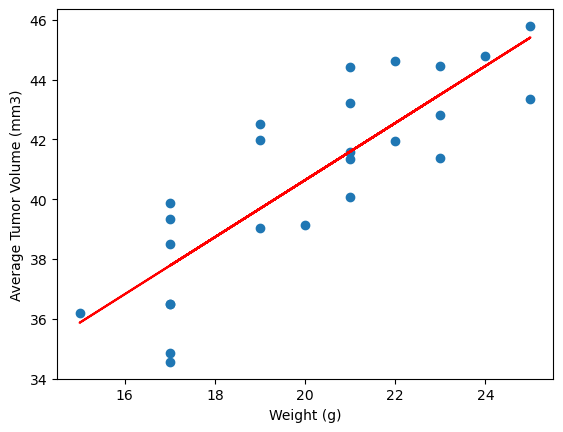

In [37]:
correlation_coefficient, _ = st.pearsonr(mouse_weights, tumor_volume_averages)
print(f"The correlation between mouse_weights and tumor_volume_averages is {correlation_coefficient:.2f}")

slope, intercept, _, _, _ = st.linregress(mouse_weights, tumor_volume_averages)

plt.scatter(mouse_weights, tumor_volume_averages)
plt.plot(mouse_weights, slope * mouse_weights + intercept, color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()